In [1]:
import geopandas as gpd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

## Latitude - north to south -> horizontal lines -> acts as y
## Longitude - east to west -> vertical lines -> acts as x

### Loadign the required data.

In [2]:
shapefile_path = r"/home/vedanshi/Documents/DSML/IMD work/Narmada/NARMADA.shp"
gdf = gpd.read_file(shapefile_path)

In [3]:
print(f"Current CRS: {gdf.crs}")

Current CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",24],PARAMETER["central_meridian",80],PARAMETER["standard_parallel_1",12.4729444],PARAMETER["standard_parallel_2",35.17280555],PARAMETER["false_easting",4000000],PARAMETER["false_northing",4000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [4]:
gdf = gdf.to_crs(epsg=4326)

In [5]:
nc_file = "/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2005_rfp25.nc" # 2005s data is loaded.
dataset = Dataset(nc_file, 'r')

In [6]:
path2='/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2015_rfp25.nc' # 2015s data 
dataset1 = Dataset(path2, 'r')
path3='/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2021_rfp25.nc' # 2021s data
dataset2 = Dataset(path3, 'r')

In [7]:
print("All variable keys:")
print(dataset.variables.keys())#,'\n',dataset1.variables.keys(),'\n',dataset2.varaibles.keys())

All variable keys:
dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])


In [8]:
dataset1.variables.keys()

dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])

In [9]:
dataset2.variables.keys()

dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])

In [10]:
latitude = dataset.variables['LATITUDE'][:]
longitude = dataset.variables['LONGITUDE'][:]
precipitation = dataset.variables['RAINFALL'][:]
precipitation1 = dataset1.variables['RAINFALL'][:]
precipitation2 = dataset2.variables['RAINFALL'][:]
#latitude1 = dataset1.variables['LATITUDE'][:]
#longitude1 = dataset1.variables['LONGITUDE'][:]
#latitude2 = dataset2.variables['LATITUDE'][:]
#longitude2 = dataset2.variables['LONGITUDE'][:]

In [11]:
miny = 21.3
maxy = 23.8
minx = 72.6
maxx = 81.95

In [12]:
# Create a mask for the bounding box
lat_mask = (latitude >= miny) & (latitude <= maxy)
lon_mask = (longitude >= minx) & (longitude <= maxx )

In [13]:
# Crop the precipitation data to the bounding box
precipitation_cropped = precipitation[:, lat_mask, :][:, :, lon_mask]
precipitation_cropped1 = precipitation1[:, lat_mask, :][:, :, lon_mask]
precipitation_cropped2 = precipitation2[:, lat_mask, :][:, :, lon_mask]

In [14]:
print(precipitation_cropped.shape==precipitation_cropped1.shape==precipitation_cropped2.shape)

True


In [15]:
precipitation_day = precipitation_cropped[0]
precipitation_day1 = precipitation_cropped1[0]
precipitation_day2 = precipitation_cropped2[0]

In [16]:
precip_day1_2005 = precipitation_day.filled(fill_value=0)
precip_day1_2015 = precipitation_day1.filled(fill_value=0)
precip_day1_2021 = precipitation_day2.filled(fill_value=0)

In [17]:
precipitation={'2005':precip_day1_2005,'2015':precip_day1_2015,'2021':precip_day1_2021}

In [18]:
precipitation['2015']

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.98093748e-01, 1.05621910e+01,
        1.01032047e+01, 9.94757366e+00, 1.03191710e+01, 1.48726063e+01,
        3.03020840e+01, 4.26476593e+01, 4.08819580e+01, 3.87063446e+01,
        3.98728676e+01, 5.08384857e+01, 7.86690521e+01, 9.36542206e+01,
        4.26098862e+01, 8.59540176e+00, 7.19787979e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.06938326e+00, 1.17564611e+01,
        1.08974581e+01, 6.90147924e+00, 1.62341156e+01, 2.58180428e+01,
        1.51986618e+01, 2.53204365e+01, 3.66083717e+01, 3.20365105e+01,
        3.02111130e+01, 5.85774765e+01,

In [19]:
precipitation['2021']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [20]:
precipitation['2005']

array([[0.        , 0.        , 0.10043453, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.     

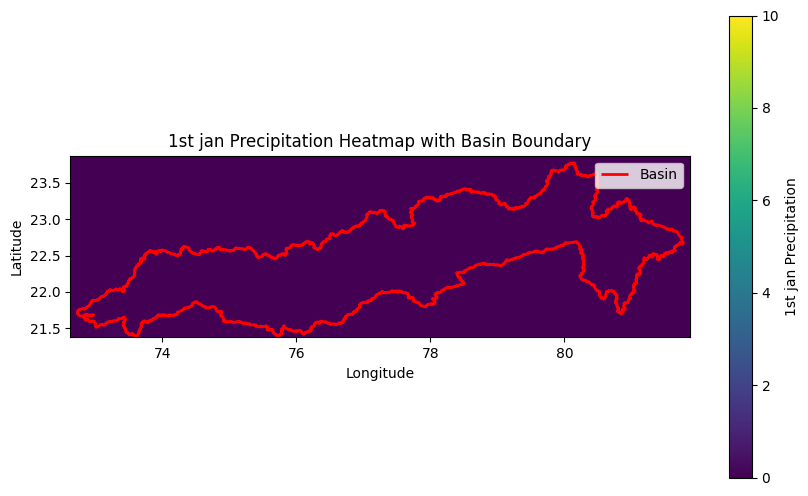

In [21]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar

c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1_2005, 
                shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='1st jan Precipitation')
# Oerlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')
# Ad the legend
ax.legend()
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('1st jan Precipitation Heatmap with Basin Boundary')
# Dsplay the plot
plt.show()

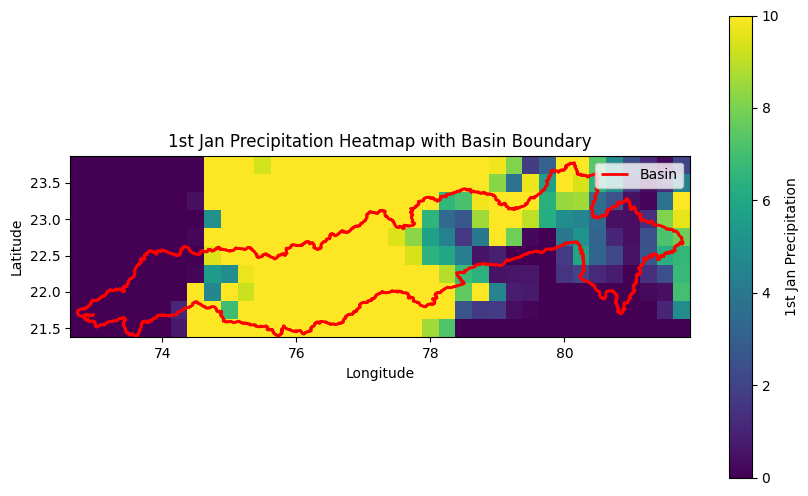

In [22]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar

c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1_2015, 
                shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='1st Jan Precipitation')
# Oerlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')
# Ad the legend
ax.legend()
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('1st Jan Precipitation Heatmap with Basin Boundary')
# Dsplay the plot
plt.show()

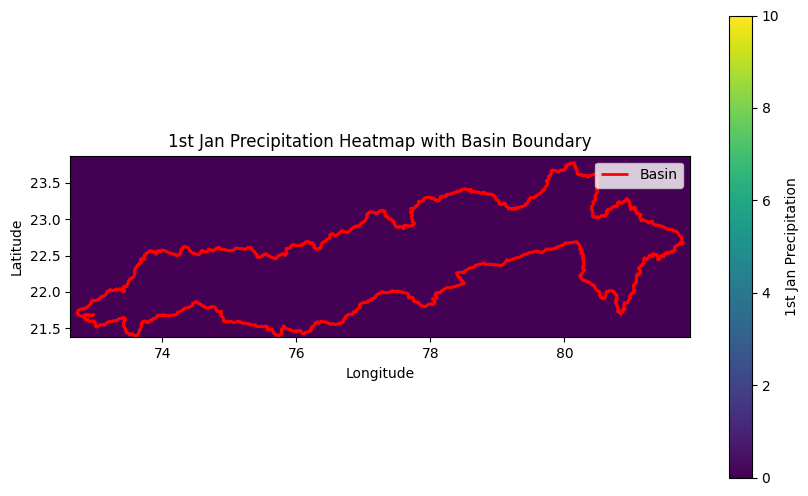

In [23]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar

c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1_2021, 
                shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='1st Jan Precipitation')
# Oerlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')
# Ad the legend
ax.legend()
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('1st Jan Precipitation Heatmap with Basin Boundary')
# Dsplay the plot
plt.show()

We have to find the weghted area average of the closest 3-4 points, and then assing that value to the cetroid, and add the values to get the area to the main centroid of the small region.

for that we'll first have to create the custom grid that is not present in this code.

### Creating custom grid.

In [24]:
# gdf is the shape file for narmada.
# dataset is the rain data.
import geopandas as gpd 
import matplotlib as ma
import pandas as pd
import threading as thread
import fiona
import matplotlib as plt
import plotly.express as plt
import numpy as np

In [25]:
bound_box=gdf.total_bounds
minx_grid,miny_grid,maxx_grid,maxy_grid=bound_box
bound_box

array([72.73538871, 21.38320554, 81.77175067, 23.78039251])

In [26]:
from shapely.geometry import box
# Create a rectangle from these coordinates using shapely's box function
rectangle = gpd.GeoSeries([box(minx_grid, miny_grid, maxx_grid, maxy_grid)], crs=gdf.crs)
# Print the rectangle coordinates
print(f"Bounding Box Coordinates: {bound_box}")
print(f"Rectangle Geometry: {rectangle}")

Bounding Box Coordinates: [72.73538871 21.38320554 81.77175067 23.78039251]
Rectangle Geometry: 0    POLYGON ((81.77175 21.38321, 81.77175 23.78039...
dtype: geometry


<Axes: >

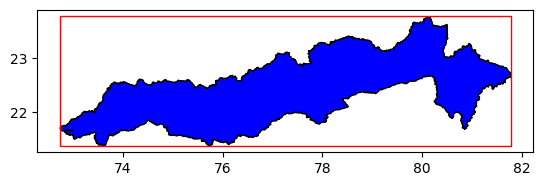

In [27]:
ax=gdf.plot(color='blue',edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='red') # I don't understand why is this sometiems shows an error.

In [28]:
#Increase the rectangle size by 15 km in both height and width
minx_new = minx_grid - 0.125
miny_new = miny_grid - 0.125
maxx_new = maxx_grid + 0.125
maxy_new = maxy_grid + 0.125

In [29]:
new_bounding_box = [minx_new, miny_new, maxx_new, maxy_new]
rectangle_new = gpd.GeoSeries([box(minx_new, miny_new, maxx_new, maxy_new)], crs=gdf.crs)
# Print the new bounding box coordinates as integers
print(f"New Bounding Box Coordinates: {list(map(float, new_bounding_box))}")

# Calculate and print the dimensions of the new rectangle as integers
width_new = maxx_new - minx_new
height_new = maxy_new - miny_new
print(f"New Rectangle Dimensions: Width = {float(width_new)}, Height = {float(height_new)}")

New Bounding Box Coordinates: [72.61038870964097, 21.258205539696, 81.89675066713441, 23.905392513851126]
New Rectangle Dimensions: Width = 9.28636195749344, Height = 2.647186974155126


<Axes: >

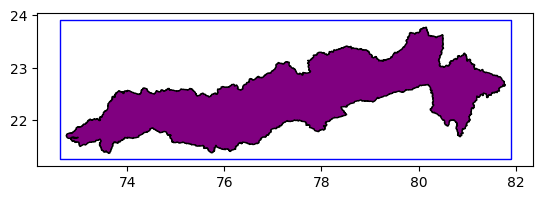

In [30]:
ax = gdf.plot(color='purple', edgecolor='k')
rectangle_new.plot(ax=ax, color='none', edgecolor='blue')

In [31]:
# using minx and maxx, i.e the boundary poits for the grid.
# initialize an empty list to store x-values for the custom grid
x_values = []
# generate x-values
current_x = minx
increment = 0.25 #this is an inceremnet of 0.25
while current_x <= maxx:
    x_values.append(current_x)  
    current_x += increment
len(x_values)

38

In [32]:
# using miny and maxy, i.e the boundary poits for the grid.
# initialize an empty list to store y-values for the custom grid
y_values = []
# generate y-values
current_y = miny
increment = 0.25 #this is an inceremnt of 0.25
while current_y <= maxy:
    y_values.append(current_y)  
    current_y += increment
len(y_values)

11

In [33]:
x_values = np.array(x_values, dtype=float) # x_values are the longitudes and y_values are the latitudes.
y_values = np.array(y_values, dtype=float)

In [34]:
# function to calculate grid parameters
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [35]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]
    
    dy = y_values[1] - y_values[0]
    k = 0
    
    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)
    
    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [round(loncell[i], 2), round(loncell[i], 2), round(loncell[i+1], 2), round(loncell[i+1], 2), round(loncell[i], 2)]
            y_coords = [round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2)] if dy > 0 else \
                       [round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2)]
            
            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': round(lon, 2), 'Yc': round(lat, 2)}
            k += 1
    return grid_cell

In [36]:
if __name__ == "__main__":
    grid_cell = initialize_and_populate_grid(x_values, y_values)

In [37]:
grid_cell

[{'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.18, 21.42, 21.42, 21.18, 21.18],
  'Xc': 72.6,
  'Yc': 21.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.42, 21.68, 21.68, 21.42, 21.42],
  'Xc': 72.6,
  'Yc': 21.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.68, 21.92, 21.92, 21.68, 21.68],
  'Xc': 72.6,
  'Yc': 21.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.92, 22.18, 22.18, 21.92, 21.92],
  'Xc': 72.6,
  'Yc': 22.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.18, 22.42, 22.42, 22.18, 22.18],
  'Xc': 72.6,
  'Yc': 22.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.42, 22.68, 22.68, 22.42, 22.42],
  'Xc': 72.6,
  'Yc': 22.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.68, 22.92, 22.92, 22.68, 22.68],
  'Xc': 72.6,
  'Yc': 22.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.92, 23.18, 23.18, 22.92, 22.92],
  'Xc': 72.6,
  'Yc': 23.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [23.18, 2

In [38]:
len(grid_cell)==38*11

True

In [39]:
# creating a geodataframe for grid cells as polygons
from shapely.geometry import Polygon
import geopandas as gpd

grid_cells = []

for cell in grid_cell:
    polygon = Polygon(list(zip(cell['X'], cell['Y'])))
    grid_cells.append(polygon)

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

print(grid_gdf.head())

                                            geometry
0  POLYGON ((72.47000 21.18000, 72.47000 21.42000...
1  POLYGON ((72.47000 21.42000, 72.47000 21.68000...
2  POLYGON ((72.47000 21.68000, 72.47000 21.92000...
3  POLYGON ((72.47000 21.92000, 72.47000 22.18000...
4  POLYGON ((72.47000 22.18000, 72.47000 22.42000...


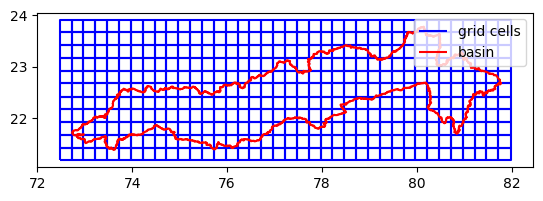

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue',label='grid cells')
gdf.boundary.plot(ax=ax, color='red',label='basin')
plt.legend()
plt.show()

## We now have to find the total precipitation of the grid, and then find the area average and assign it to Narmada on its centroid

### The process of finding weighted average begins

In [41]:
total_prcp={'2005':precipitation['2005'].sum(),'2015':precipitation['2015'].sum(),'2021':precipitation['2021'].sum()}
A=0.25*0.25*len(grid_cells) #total area of the grid
narm_const={'2005':(total_prcp['2005']/A),'2015':(total_prcp['2015']/A),'2021':(total_prcp['2021']/A)}

formula for the weighted average is: $$ p_{i} = \frac {P}{A} \cdot a_{i} $$ where
$$p_{i} = precipitaion of the region within a grid cell $$
$$a_{i} = area of the grid occupied by the small subbasin$$
$$ A = area of the entire cell$$
$$ P = total precipitaion of that cell $$
$$ 

In [42]:
print('',total_prcp['2005'],'\n',total_prcp['2015'],'\n',total_prcp['2021'])

 0.10043452680110931 
 4800.763434641063 
 0.0


In [43]:
A

26.125

In [44]:
intersecting_cells = gpd.sjoin(grid_gdf, gdf, how="inner", predicate="intersects")
num_intersecting_cells = len(intersecting_cells)
print(f"Number of intersecting cells: {num_intersecting_cells}")


Number of intersecting cells: 196


In [45]:
# Calculate the intersection area
intersecting_cells['intersection_area'] = intersecting_cells.apply(lambda row: row['geometry'].intersection(gdf.loc[row['index_right'], 'geometry']).area, axis=1)

In [46]:
gdf

,AREA,PERIMETER,AREA_SQKM,BA_ID,BA_NAME,Latitude,Longitude,Place,geometry
0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,"POLYGON ((73.42627 21.51741, 73.42601 21.52111..."


In [47]:
intersecting_cells

,geometry,index_right,AREA,PERIMETER,AREA_SQKM,BA_ID,BA_NAME,Latitude,Longitude,Place,intersection_area
12,"POLYGON ((72.72000 21.42000, 72.72000 21.68000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.009572
13,"POLYGON ((72.72000 21.68000, 72.72000 21.92000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.024914
23,"POLYGON ((72.97000 21.42000, 72.97000 21.68000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.031182
24,"POLYGON ((72.97000 21.68000, 72.97000 21.92000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.056665
25,"POLYGON ((72.97000 21.92000, 72.97000 22.18000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.006705
...,...,...,...,...,...,...,...,...,...,...,...
392,"POLYGON ((81.22000 22.92000, 81.22000 23.18000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.004872
401,"POLYGON ((81.47000 22.42000, 81.47000 22.68000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.028076
402,"POLYGON ((81.47000 22.68000, 81.47000 22.92000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.042807
412,"POLYGON ((81.72000 22.42000, 81.72000 22.68000...",0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,0.000544


In [48]:
narmada_intersected_area=intersecting_cells['intersection_area'].sum()

In [49]:
grid_cell

[{'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.18, 21.42, 21.42, 21.18, 21.18],
  'Xc': 72.6,
  'Yc': 21.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.42, 21.68, 21.68, 21.42, 21.42],
  'Xc': 72.6,
  'Yc': 21.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.68, 21.92, 21.92, 21.68, 21.68],
  'Xc': 72.6,
  'Yc': 21.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.92, 22.18, 22.18, 21.92, 21.92],
  'Xc': 72.6,
  'Yc': 22.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.18, 22.42, 22.42, 22.18, 22.18],
  'Xc': 72.6,
  'Yc': 22.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.42, 22.68, 22.68, 22.42, 22.42],
  'Xc': 72.6,
  'Yc': 22.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.68, 22.92, 22.92, 22.68, 22.68],
  'Xc': 72.6,
  'Yc': 22.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.92, 23.18, 23.18, 22.92, 22.92],
  'Xc': 72.6,
  'Yc': 23.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [23.18, 2

In [50]:
main_centorid_lon=0.0
main_centorid_lat=0.0
sum_lon=0.0 # x coordinate
sum_lat=0.0 # y coordinate
for i in grid_cell:
    sum_lon+=i['Xc']
    sum_lat+=i['Yc']
main_centorid_lon=sum_lon/len(grid_cell)
main_centorid_lat=sum_lat/len(grid_cell)

In [51]:
# We now have to just get the weighted average on this coordinate
print(main_centorid_lon)
print(main_centorid_lat)

77.22499999999944
22.550000000000015


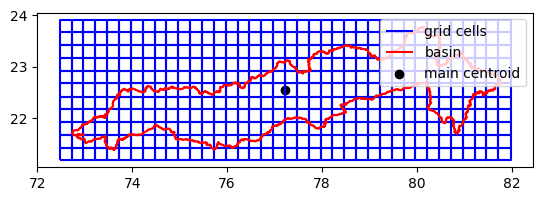

In [54]:
import matplotlib.pyplot as plt
# Assuming you already have grid_gdf and gdf defined somewhere in your code

fig, ax = plt.subplots()

# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')

# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')

# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')

plt.legend()
plt.show()


### Finding the weighted average for 2005, 2015 & 2021

In [55]:
weighted_avg={'2005': narm_const['2005']*narmada_intersected_area,'2015':narm_const['2015']*narmada_intersected_area,'2021':narm_const['2021']*narmada_intersected_area}

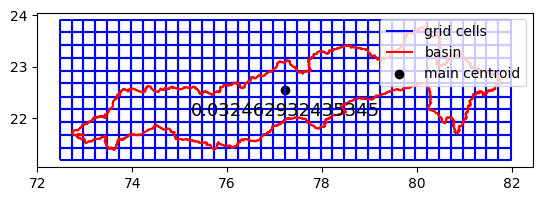

In [63]:
# for 2005
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
# Add label or annotation for the main centroid point
main_centroid_value=weighted_avg['2005']
text_offset = 0.5
ax.text(main_centorid_lon, main_centorid_lat-text_offset, f'{main_centroid_value}', color='black', fontsize=13, ha='center')

plt.legend()
plt.show()


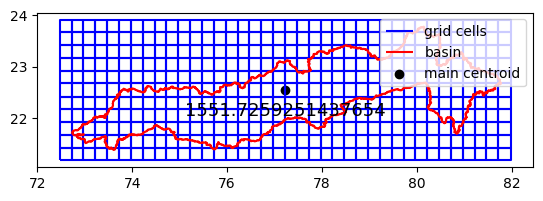

In [64]:
# for 2015
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
# Add label or annotation for the main centroid point
main_centroid_value=weighted_avg['2015']
text_offset = 0.5
ax.text(main_centorid_lon, main_centorid_lat-text_offset, f'{main_centroid_value}', color='black', fontsize=13, ha='center')

plt.legend()
plt.show()


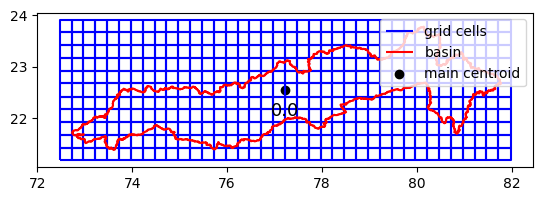

In [65]:
# for 2021
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
# Add label or annotation for the main centroid point
main_centroid_value=weighted_avg['2021']
text_offset = 0.5
ax.text(main_centorid_lon, main_centorid_lat-text_offset, f'{main_centroid_value}', color='black', fontsize=13, ha='center')

plt.legend()
plt.show()
